# **Advanced Quickstart Guide**

This guide fllows the same format as `Quickstart Guide` but explores further functionality provided by twinLab. In this jupyter notebook we will:

    1. Upload a dataset to twinLab.
    2. List, view and querey uploaded datasets.
    3. Use `tl.train_campaign` to create a surrogate model.
    4. List, view and querye trained campaigns.
    5. Use the model to make a prediction with `tl.predict_campaign`.
    6. Visualise the results and their uncertainty.
    7. Verify the model using `tl.sample_campaign`.

In [ ]:
# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Project imports
import twinlab as tl

### **API setup**

The first time you use twinLab you will have to enter your API key and confirm you have the correct URL set.

In [ ]:
# Set the API key
tl.set_api_key("my_api_key")

# Check which url is being used
tl.get_server_url()

# Set the server url
tl.set_server_url("http://twinlab.digilab.co.uk")

### **Your twinLab information**

Confirm your twinLab version

In [2]:
tl.get_versions()

{'cloud': '2.0.0',
 'modal': '0.2.0',
 'library': '1.2.0',
 'image': 'jasper-twinlab-deployment'}

And view your user information, including how many credits you have.

In [3]:
tl.get_user_information()

{'username': 'jasper@digilab.co.uk', 'credits': 0}

### **Upload a dataset**

Datasets must be data presented as a `pandas.DataFrame` object, or a filepaths which points to a csv file that can be parsed to a `pandas.DataFrame` object. **Both must be formatted with clearly labelled columns.** Here, we will label the input (predictor) variable `x` and the output variable `y`. In `twinlab`, data is expected to be in column-feature format, meaning each row represents a single data sample, and each column represents a data feature. 

Datasets must be uploaded with a `dataset_id` which is used to access them from the cloud.

In [4]:
x = [0.6964691855978616,
0.28613933495037946,
0.2268514535642031,
0.5513147690828912,
0.7194689697855631,
0.42310646012446096,
0.9807641983846155,
0.6848297385848633,
0.48093190148436094,
0.3921175181941505]

y = [-0.8173739564129022,
0.8876561174050408,
0.921552660721474,
-0.3263338765412979,
-0.8325176123242133,
0.4006686354731812,
-0.16496626502368078,
-0.9607643657025954,
0.3401149876855609,
0.8457949914442409]

# Creating the dataframe using the above arrays
df = pd.DataFrame({'x': x, 'y': y})

# View the dataset before uploading
display(df)

# Define the name of the dataset
dataset_id = "example_data"

# Upload the dataset
tl.upload_dataset(df, dataset_id, verbose=True)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


Dataframe is uploading.
Processing dataset.
Dataset example_data was processed.


If your data is stored in a csv file the you must input the filepath string into `tl.upload_dataset`.

In [ ]:
# Define the fielpath of the csv
df_filepath = "example_data_folder/example_data.csv"

# Define the name of the dataset
dataset_id = "example_data"

# Upload the dataset to the cloud
tl.upload_dataset(df_filepath, dataset_id, verbose=True)

### **View datasets**

Once a dataset has been uploaded it can be easily acccesed using built in twinLab functions. A list of all uploaded dataset can be produced, individual datasets can be viewed and you can even querey a dataset to get a statistical summary of its data.

In [5]:
# List all datasets on cloud
tl.list_datasets()

['example_data']

In [6]:
# View the dataset
tl.view_dataset(dataset_id)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


In [7]:
# Querey the dataset to get a statistical summary
tl.query_dataset(dataset_id)

,x,y
count,10.000000,10.000000
mean,0.544199,0.029383
std,0.229352,0.748191
min,0.226851,-0.960764
25%,0.399865,-0.694614
50%,0.516123,0.087574
75%,0.693559,0.734513
max,0.980764,0.921553


### **Train a campaign**

The `campaign` class is used to train and implement your surrogate models. As with datasets, an id is defined, this is what the model will be saved as in the cloud. When training a model the arguments are passed using a dictionary; here we name that dictionary `campaign_params`. To train the model we use the `tl.train_campaign` function, inputting the dictionary and `campaign_id`.

In [8]:
campaign_id = "example_campaign"

campaign_params = {
    "dataset_id": dataset_id,       # This points the campaign to the uploaded dataset
    "inputs": ["x"],                # Using the datasets column headers define the input and output data
    "outputs": ["y"],
    "test_train_ratio": 0.8         # Determine how much data is used for training, here 80% is used to train the model  
}                                   # and 20% is used to test it.     

# Start a new campaign and train a surrogate model
tl.train_campaign(campaign_params, campaign_id, verbose=True)

Model example_campaign has begun training.


### **View campaigns**

Just as with datasets all saved campaigns can be listed and queried.

In [9]:
# List campaigns
tl.list_campaigns()

['example_campaign']

In [10]:
# View a campaigns parameters
tl.view_campaign(campaign_id)

{'id': 'example_campaign',
 'dataset_id': 'example_data',
 'inputs': ['x'],
 'outputs': ['y'],
 'train_test_ratio': 0.8,
 'modal_handle': 'fc-Lu1kiGyQ92KUjXAfnmBvh9'}

In [11]:
# View the status of a campaign
tl.query_campaign(campaign_id)

{'model_summary': {'transformer_diagnostics': [],
  'estimator_diagnostics': {'covar_module': 'ScaleKernel(\n  (base_kernel): MaternKernel(\n    (lengthscale_prior): GammaPrior()\n    (raw_lengthscale_constraint): Positive()\n  )\n  (outputscale_prior): GammaPrior()\n  (raw_outputscale_constraint): Positive()\n)',
   'mean_module': 'ConstantMean()',
   'likelihood.noise_covar.raw_noise': [0.009517051465063415],
   'likelihood.noise_covar.noise_prior.concentration': 1.100000023841858,
   'likelihood.noise_covar.noise_prior.rate': 0.05000000074505806,
   'likelihood.noise_covar.raw_noise_constraint.lower_bound': 9.999999747378752e-05,
   'likelihood.noise_covar.raw_noise_constraint.upper_bound': inf,
   'mean_module.raw_constant': 0.24830962865658485,
   'covar_module.raw_outputscale': 0.4935421612575323,
   'covar_module.base_kernel.raw_lengthscale': [[-0.666875291872184]],
   'covar_module.base_kernel.lengthscale_prior.concentration': 3.0,
   'covar_module.base_kernel.lengthscale_prior

### **Using a predict campaign**

The surrogate model is now trained and saved to the cloud under the `campaign_id`. It can now be used to make predictions. First define a dataset of inputs for which you want to find outputs; ensure that this is a `pandas.DataFrame` object or a file path for a correctly formatted csv. Then call `tl.predict_campaign` with the keyword arguments being the evaluation dataset and the `campaign_id` of the model you wish to use.

In [12]:
# Define the inputs for the dataset
x_eval = np.linspace(0,1,128)

# Convert to a dataframe
df_eval = pd.DataFrame({'x':x_eval})
display(df_eval)

# Predict the results
df_mean, df_std = tl.predict_campaign(df_eval, campaign_id)

,x
0,0.000000
1,0.007874
2,0.015748
3,0.023622
4,0.031496
...,...
123,0.968504
124,0.976378
125,0.984252
126,0.992126


Alternatively the dataset can be used driectly from a csv by inputting its filepath.

In [ ]:
# The define the file path of the csv
df_eval_filepath = "example_data_folder/example_eval_data.csv"

# Predict the results
df_mean, df_std = tl.predict_campaign(df_eval, campaign_id)

### **Viewing the results**
`tl.predict_campaign` outputs mean values for each input and their standard deviation; this gives the abilty to nicely visualise the uncertainty in results.


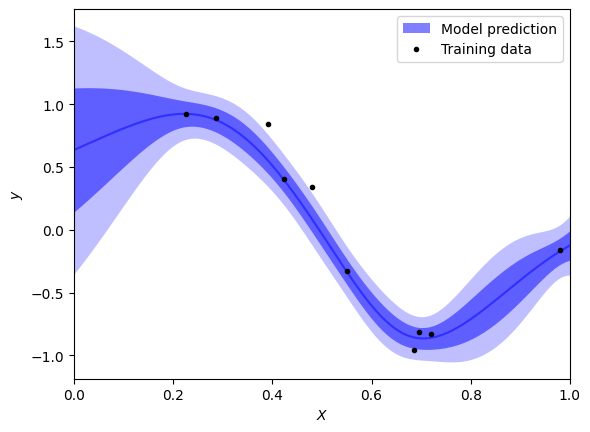

In [14]:
# Plot parameters
nsigs = [1, 2]
# nsigs = [0.674, 1.960, 2.576]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean["y"]
err = df_std["y"]
if plot_model_bands:
    label = r"Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
if plot_model_mean:
    label = r"Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color="black", label="Training data")
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Using a sample campaign**

The `tl.sample_campaign` function can be used to retrieve a number of results from your model. It requires the inputs for which you want the values and how many outputs to calculate for each.

In [15]:
# Define the sample inputs
sample_inputs = pd.DataFrame({'x': np.linspace(0,1,20)})

# Define number of samples to calculate for each input
num_samples = 3

sample_result = tl.sample_campaign(sample_inputs, campaign_id, num_samples)

# View the results in the form of a dataframe
display(sample_result)

y                    
           0         1         2
0   1.325517  0.901742  0.443879
1   1.370084  1.002154  0.596526
2   1.322354  1.007334  0.714428
3   1.198461  0.959523  0.875559
4   1.057219  0.830244  1.000054
5   0.898938  0.744924  0.988151
6   0.730687  0.700340  0.845671
7   0.608187  0.611015  0.599649
8   0.435439  0.449653  0.389812
9   0.130920  0.148791  0.097399
10 -0.191505 -0.170955 -0.185469
11 -0.475355 -0.487872 -0.465011
12 -0.723600 -0.721874 -0.736349
13 -0.825656 -0.851098 -0.828713
14 -0.844534 -0.861911 -0.742603
15 -0.788315 -0.724577 -0.541068
16 -0.679415 -0.536587 -0.377122
17 -0.589223 -0.363319 -0.235290
18 -0.399301 -0.201631 -0.189671
19  0.009497 -0.235810 -0.192017

### **Viewing the results**

The results can be plotted over the top of the previous graph giving a nice visualisation of the sampled data, with the model's uncertainity.

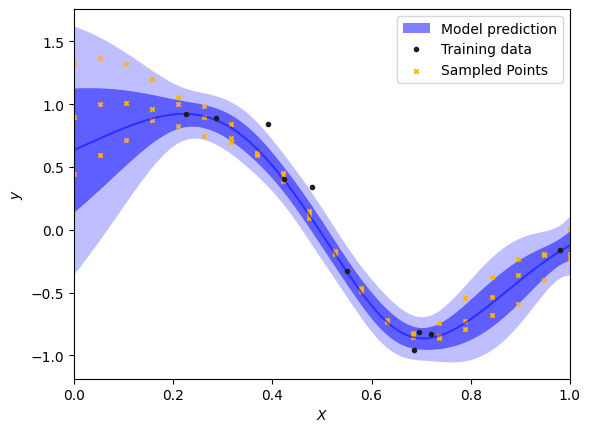

In [19]:
# Plot parameters
nsigs = [1, 2]
# nsigs = [0.674, 1.960, 2.576]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean["y"]
err = df_std["y"]
if plot_model_bands:
    label = r"Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
if plot_model_mean:
    label = r"Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color="#1d1d1b", label="Training data")
for i in range(num_samples):
    plt.scatter(sample_inputs, sample_result.values[:,i], marker='x', s=9, c='#ffb500')
plt.scatter([], [], marker='x', s=9, c='#ffb500', label='Sampled Points')
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### **Deleteing datasets and campaigns**

To keep your cloud storage tidy you should delete your datasets and campaigns when you are finished with them. `tl.delete_campaign` and `tl.delete_dataset` only deletes them from the cloud storage.

In [20]:
# Delete dataset
tl.delete_dataset(dataset_id)

# Delete campaign
tl.delete_campaign(campaign_id)